# Install and Import the libraries

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=RuntimeWarning)


# Data Manipulation libraries
import pandas as pd
import numpy as np

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Estimators and metrics
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix,roc_curve,auc,roc_auc_score,accuracy_score
from sklearn.calibration import CalibratedClassifierCV


# NLP libraries
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec,KeyedVectors

import re
import pickle

from tqdm import tqdm
from collections import Counter
from scipy.sparse import hstack
#Code Reference: https://ptable.readthedocs.io/en/latest/tutorial.html
from prettytable import PrettyTable


In [2]:
# Read the data into Pandas Dataframe
project_data= pd.read_csv('../train_data.csv')
resource_data = pd.read_csv('../resources.csv')

In [3]:
print('Number of data points in the  Train dataset :',project_data.shape[0])
print("-"*53)
print('Number of features in the Train dataset :',project_data.shape[1])
print("-"*53)
print("List of Features in the Train dataset:\n",project_data.columns.values.tolist())

Number of data points in the  Train dataset : 109248
-----------------------------------------------------
Number of features in the Train dataset : 17
-----------------------------------------------------
List of Features in the Train dataset:
 ['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state', 'project_submitted_datetime', 'project_grade_category', 'project_subject_categories', 'project_subject_subcategories', 'project_title', 'project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4', 'project_resource_summary', 'teacher_number_of_previously_posted_projects', 'project_is_approved']


In [4]:
print('Number of data points in the  Resourse dataset :',resource_data.shape[0])
print("-"*55)
print('Number of features in the Resourse dataset :',resource_data.shape[1])
print("-"*55)
print("List of Features in the Resourse dataset:",resource_data.columns.values.tolist())

Number of data points in the  Resourse dataset : 1541272
-------------------------------------------------------
Number of features in the Resourse dataset : 4
-------------------------------------------------------
List of Features in the Resourse dataset: ['id', 'description', 'quantity', 'price']


In [5]:
cols=['Date' if each_col=='project_submitted_datetime' else each_col for each_col in project_data.columns.values.tolist()] 

project_data['Date']=pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime',axis=1,inplace=True)
project_data.sort_values(by=['Date'],inplace=True)

In [6]:
project_data=project_data[cols]

print("Sample records from  Training data ")
project_data.head()

Sample records from  Training data 


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1
51140,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,Grades PreK-2,Literacy & Language,Literacy,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,1
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Literacy & Language,Literacy,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1


In [7]:
print("Sample records from  Resourse data ")
resource_data.head()

Sample records from  Resourse data 


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


#  Data Analysis

In [8]:
def check_class_bal(dataset,target_class):
    count_per_class=list(dataset[target_class].value_counts())
    classes=list(dataset[target_class].value_counts().index)
    
    print("Ratio of the classes :")
    
    for each_cls,cls_count in zip(classes,count_per_class):
        print("Class {} has {} records with a ratio of {}%".
              format(each_cls,cls_count,np.round((cls_count/dataset.shape[0]*100),2)))
        
    plt.bar(classes,count_per_class,color=['b','r'])
    plt.xticks(classes)
    plt.ylabel("Count")
    plt.xlabel("Classes")
    plt.title("Plot for Data Imbalance")
    plt.show()
    
    del classes
    del count_per_class

Ratio of the classes :
Class 1 has 92706 records with a ratio of 84.86%
Class 0 has 16542 records with a ratio of 15.14%


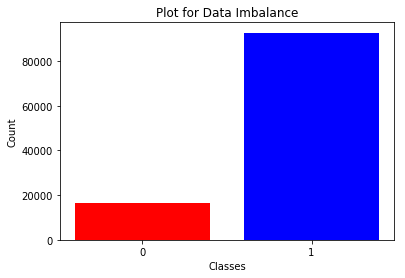

In [9]:
check_class_bal(project_data,'project_is_approved')

# Data Preprocessing

## chek for null values

In [10]:
print("Null values from Train data :\n")
print(project_data.isnull().sum())

Null values from Train data :

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
Date                                                 0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64


In [11]:
project_data['teacher_prefix'].fillna(method='ffill',inplace=True)

In [12]:
project_data['essay']=project_data.project_essay_1.map(str)+\
project_data.project_essay_2.map(str)+\
project_data.project_essay_3.map(str)+\
project_data.project_essay_4.map(str)


In [13]:
project_data.drop(columns=['project_essay_1','project_essay_2',
                           'project_essay_3','project_essay_4'],axis=1,inplace=True)

In [14]:
project_data.isnull().sum()

Unnamed: 0                                      0
id                                              0
teacher_id                                      0
teacher_prefix                                  0
school_state                                    0
Date                                            0
project_grade_category                          0
project_subject_categories                      0
project_subject_subcategories                   0
project_title                                   0
project_resource_summary                        0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
essay                                           0
dtype: int64

In [15]:
print("Null values from Train data :\n")
print(resource_data.isnull().sum())


Null values from Train data :

id               0
description    292
quantity         0
price            0
dtype: int64


In [16]:
resource_data['description'].fillna(method='ffill',inplace=True)

In [17]:
resource_data.isnull().sum()

id             0
description    0
quantity       0
price          0
dtype: int64

## Text Pre-processing

In [18]:
def processed_list(list_elements):
    processed_list=[]
    for i in list_elements:
        temp=''
        for j in i.split(','):
            if 'The' in j.split():
                j=j.replace('The','')
            j=j.replace(' ','')
            temp+=j.strip()+' '
            temp=temp.replace('&','_')
        processed_list.append(temp.strip())
    return processed_list

In [19]:
def get_sorted_dic(col):
    my_Counter=Counter() 
    for word in list(project_data[col]):
        my_Counter.update(word.split())   
    count_dict=dict(my_Counter)
    return dict(sorted(count_dict.items(),key=lambda x: x[1]))
    

### project_subject_categories

In [20]:
clean_categories=processed_list(list(project_data['project_subject_categories']))
project_data['clean_categories']=clean_categories
project_data.drop(['project_subject_categories'],axis=1,inplace=True)
sorted_cat_dict=get_sorted_dic('clean_categories')

### project_subject_subcategories

In [21]:
clean_sub_categories=processed_list(list(project_data['project_subject_subcategories']))
project_data['clean_sub_categories']=clean_sub_categories
project_data.drop(['project_subject_subcategories'],axis=1,inplace=True)
sorted_subcat_dict=get_sorted_dic('clean_sub_categories')

### essay

In [22]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [23]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [24]:
def text_processing(dataset,feature_name):
    processed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(dataset[feature_name].values):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        processed_text.append(sent.lower().strip())
    return processed_text

In [25]:
project_data['essay']=text_processing(project_data,'essay')

100%|██████████| 109248/109248 [01:07<00:00, 1612.60it/s]


### project_title

In [26]:
project_data['project_title']=text_processing(project_data,'project_title')

100%|██████████| 109248/109248 [00:02<00:00, 36756.25it/s]


### project_resource_summary

In [27]:
project_data['project_resource_summary']=text_processing(project_data,'project_resource_summary')

100%|██████████| 109248/109248 [00:07<00:00, 14884.87it/s]


### project_grade_category

In [28]:
processed_grade=[]

for each_grade in tqdm(project_data['project_grade_category'].values):
    temp=""
    temp=each_grade.lower()
    temp=temp.replace(' ','_')
    temp=temp.replace('-','_')
    processed_grade.append(temp)
    
project_data['project_grade_category']=processed_grade

100%|██████████| 109248/109248 [00:00<00:00, 928368.18it/s]


In [29]:
# Merge the projectdata and pricedata by using id feature

price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [30]:
print("Final Feature Names:\n\n", list(project_data.columns))
print("\nSample Data set")
project_data.head()

Final Feature Names:

 ['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state', 'Date', 'project_grade_category', 'project_title', 'project_resource_summary', 'teacher_number_of_previously_posted_projects', 'project_is_approved', 'essay', 'clean_categories', 'clean_sub_categories', 'quantity', 'price']

Sample Data set


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,clean_categories,clean_sub_categories,quantity,price
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,grades_prek_2,engineering steam primary classroom,students need stem kits learn critical science...,53,1,fortunate enough use fairy tale stem kits clas...,Math_Science,AppliedSciences Health_LifeScience,4,725.05
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,grades_3_5,sensory tools focus,students need boogie boards quiet sensory brea...,4,1,imagine 8 9 years old third grade classroom se...,SpecialNeeds,SpecialNeeds,8,213.03
2,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,grades_prek_2,mobile learning mobile listening center,students need mobile listening center able enh...,10,1,class 24 students comes diverse learners stude...,Literacy_Language,Literacy,1,329.00
3,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,grades_prek_2,flexible seating flexible learning,students need flexible seating classroom choos...,2,1,recently read article giving students choice l...,AppliedLearning,EarlyDevelopment,9,481.04
4,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,grades_3_5,going deep art inner thinking,students need copies new york times best selle...,2,1,students crave challenge eat obstacles breakfa...,Literacy_Language,Literacy,14,17.74


In [31]:
y = project_data['project_is_approved'].values
X=project_data.drop(['project_is_approved'], axis=1)
project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,clean_categories,clean_sub_categories,quantity,price
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,grades_prek_2,engineering steam primary classroom,students need stem kits learn critical science...,53,1,fortunate enough use fairy tale stem kits clas...,Math_Science,AppliedSciences Health_LifeScience,4,725.05
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,grades_3_5,sensory tools focus,students need boogie boards quiet sensory brea...,4,1,imagine 8 9 years old third grade classroom se...,SpecialNeeds,SpecialNeeds,8,213.03
2,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,grades_prek_2,mobile learning mobile listening center,students need mobile listening center able enh...,10,1,class 24 students comes diverse learners stude...,Literacy_Language,Literacy,1,329.00


In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

In [33]:
print("Training data set shape:",X_train.shape)
print("Test data set shape:",X_test.shape)

Training data set shape: (76473, 15)
Test data set shape: (32775, 15)


## Feature Vectorization

### teacher_prefix

In [34]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.teacher_prefix.values)
X_tr_teacher_onehot=vectorizer.transform(X_train.teacher_prefix.values)
X_te_teacher_onehot=vectorizer.transform(X_test.teacher_prefix.values)

###  school_state

In [35]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.school_state.values)
X_tr_school_onehot=vectorizer.transform(X_train.school_state.values)
X_te_school_onehot=vectorizer.transform(X_test.school_state.values)

### project_grade_category

In [36]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.project_grade_category.values)
X_tr_grade_onehot=vectorizer.transform(X_train.project_grade_category.values)
X_te_grade_onehot=vectorizer.transform(X_test.project_grade_category.values)

###  clean_categories

In [37]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.clean_categories.values)
X_tr_cat_onehot=vectorizer.transform(X_train.clean_categories.values)
X_te_cat_onehot=vectorizer.transform(X_test.clean_categories.values)

### clean_sub_categories

In [38]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.clean_sub_categories.values)
X_tr_sub_cat_onehot=vectorizer.transform(X_train.clean_sub_categories.values)
X_te_sub_cat_onehot=vectorizer.transform(X_test.clean_sub_categories.values)

## Normalization

### price

In [39]:
nrml= Normalizer()
nrml.fit(X_train['price'].values.reshape(1,-1))

X_tr_price_nrml = nrml.transform(X_train.price.values.reshape(1,-1)).reshape(-1,1)
X_te_price_nrml = nrml.transform(X_test.price.values.reshape(1,-1)).reshape(-1,1)


### teacher_number_of_previously_posted_projects

In [40]:
nrml = Normalizer()
nrml.fit(X_train.teacher_number_of_previously_posted_projects.values.reshape(1,-1))
X_tr_teacher_number_nrml = nrml.transform(X_train.teacher_number_of_previously_posted_projects.values.reshape(1,-1)).reshape(-1,1)
X_te_teacher_number_nrml = nrml.transform(X_test.teacher_number_of_previously_posted_projects.values.reshape(1,-1)).reshape(-1,1)


In [41]:
X_tr_vec=hstack((X_tr_teacher_onehot,X_tr_school_onehot,X_tr_grade_onehot,X_tr_cat_onehot,
                 X_tr_sub_cat_onehot,X_tr_price_nrml,X_tr_teacher_number_nrml)).tocsr()
X_te_vec=hstack((X_te_teacher_onehot,X_te_school_onehot,X_te_grade_onehot,X_te_cat_onehot, X_te_sub_cat_onehot,
                 X_te_price_nrml,X_te_teacher_number_nrml)).tocsr()

In [42]:
print("After stacking :")
print("Training data set shape :",X_tr_vec.shape)
print("Test data set shape :",X_te_vec.shape)

After stacking :
Training data set shape : (76473, 101)
Test data set shape : (32775, 101)


#  Model Training

## Hypertuning Values

In [43]:
alpha_vals=[10**i  for i in range(-4,5)]
norm_values=['l1','l2']
def_model=SGDClassifier()

In [44]:
print(" Default Model:\n",def_model)

 Default Model:
 SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


In [45]:
# Avoid the bais towards the class which has more number of observations
def_model.class_weight='balanced'

In [46]:
def kfold_crossvalidate(clf,hyper_vals,X_train,y_train,n_splits):
    #ref code:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
    k_fold= KFold(n_splits=n_splits)

    train_auc=[]
    cv_auc=[]
    
    for each_val in tqdm(sorted(hyper_vals)):
        
        clf.alpha=each_val
        tr_score=0.0
        cv_score=0.0
        
        for train_index, test_index in k_fold.split(X_train):
            
            X_tr, X_cv = X_train[train_index], X_train[test_index]
            y_tr, y_cv = y_train[train_index], y_train[test_index]
            
            clf=clf.fit(X_tr,y_tr)
            
            #used CalibratedClassifierCV to get the probabilty scores 
            prob_clf=CalibratedClassifierCV(clf,method='sigmoid')
            prob_clf.fit(X_tr,y_tr)
            
            tr_score+=roc_auc_score(y_tr,prob_clf.predict_proba(X_tr)[:,1])
            cv_score+=roc_auc_score(y_cv,prob_clf.predict_proba(X_cv)[:,1])
         
        tr_score=tr_score/n_splits
        cv_score=cv_score/n_splits
        
        train_auc.append(tr_score)
        cv_auc.append(cv_score)

    return [train_auc,cv_auc]

In [47]:
def cross_validate_plot(clf,hyper_vals,norm_values,X_train,y_train,n_splits):
    reg_scores={}
    
    for reg_val in norm_values:
        clf.penalty=reg_val
        reg_scores[reg_val]=kfold_crossvalidate(clf,hyper_vals,X_train,y_train,n_splits)
    
    hyper_vals=np.log10(hyper_vals)
    
    #Code REf:https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html
    fig,plots= plt.subplots(1,2,figsize=(14,5),sharey=True)
    fig.suptitle("AUC PLOT for Train and CV datasets".upper())
    for i in range(2):
        reg_val='l'+str(i+1)
        plots[i].plot(hyper_vals,reg_scores[reg_val][0],label="TRAIN AUC")
        plots[i].scatter(hyper_vals,reg_scores[reg_val][0])
        plots[i].plot(hyper_vals,reg_scores[reg_val][1],label="CV AUC")
        plots[i].scatter(hyper_vals,reg_scores[reg_val][1])
        plots[i].set_title('L-{} Regularization'.format(i+1))
        plots[i].set(xlabel='ALPHA values', ylabel='AUC')
        plots[i].label_outer()
        plots[i].legend()
    plt.show()

In [48]:
def build_best_model_plot_roc(model,norm_values,X_train_data,y_train_data,X_test_data,y_test_data):
    
    predictions={}
    
    for reg_val,alpha in norm_values.items():
        
        model.penalty=reg_val
        model.alpha=alpha
        model.fit(X_train_data,y_train_data)
        
        prob_clf=CalibratedClassifierCV(model,method='sigmoid')
        prob_clf.fit(X_train_data,y_train_data)
        
        y_tr_pred=prob_clf.predict_proba(X_train_data)[:,1]
        y_te_pred=prob_clf.predict_proba(X_test_data)[:,1]
        
        predictions[reg_val]=[y_tr_pred,y_te_pred]
        
    plot_roc(predictions,y_train_data,y_test_data) 
    
    del y_tr_pred
    del y_te_pred

In [49]:
def plot_roc(predictions,y_train,y_test):

    #Code REf:https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html
    fig,plots= plt.subplots(1,2,figsize=(14,5),sharey=True)
    fig.suptitle("ROC Curves".upper())
    
    cutoof_predictions={}
    
    for i in range(2):
        reg_val='l'+str(i+1)
        
        y_train_prob=predictions[reg_val][0]
        y_test_prob=predictions[reg_val][1]
        
        fpr_tr,tpr_tr,thr_tr=roc_curve(y_train,y_train_prob)
        fpr_te,tpr_te,thr_te=roc_curve(y_test,y_test_prob)
        
        plots[i].plot(fpr_tr,tpr_tr,label="AUC score for Train data is : {}".format(np.round(auc(fpr_tr,tpr_tr),4)))
        plots[i].plot(fpr_te,tpr_te,label="AUC score is Test data is  : {}".format(np.round(auc(fpr_te,tpr_te),4)))
        plots[i].plot([0,1],[0,1],'k--',label="Random Curve AUC score is :{}".format(0.5))
        plots[i].set_title('L-{} Regularization'.format(i+1))
        plots[i].set(xlabel='FPR', ylabel='TPR')
        plots[i].legend()
        plots[i].label_outer()
        
        cutoof_thr=thr_tr[np.argmax(tpr_tr*(1-fpr_tr))]
        
        y_train_pred=predict_with_best_t(y_train_prob,cutoof_thr)
        y_test_pred=predict_with_best_t(y_test_prob,cutoof_thr)
        
        cutoof_predictions[reg_val]=[y_train_pred,y_test_pred]
        cutoof_predictions[reg_val+'max']=np.round(max(tpr_tr*(1-fpr_tr)),5)
        cutoof_predictions[reg_val+'cut_off']=np.round(cutoof_thr,5)

    plot_confusion_matrix(cutoof_predictions,y_train,y_test)   
    display_accuracy(cutoof_predictions,y_train,y_test)
    
    del y_train_prob
    del y_test_prob
    del y_train_pred
    del y_test_pred

In [50]:
def predict_with_best_t(pred_proba, cut_off):
    pred= []
    for i in pred_proba:
        if i>=cut_off:
            pred.append(1)
        else:
            pred.append(0)
    return pred

In [51]:
def plot_confusion_matrix(predictions,y_train,y_test):
    fig = plt.figure(figsize = (14,7)) 
    fig.suptitle("Confusion Matrix for Train and Test datasets")
    
    ax1 = fig.add_subplot(221) 
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    ax1.set_title("Train data with L-1")
    sns.heatmap(confusion_matrix(y_train,predictions['l1'][0]), 
                            annot=True, fmt="d",cmap="YlGnBu",ax=ax1,)
    
    ax3.set_title("Test data with L-1")
    sns.heatmap(confusion_matrix(y_test,predictions['l1'][1]), 
                            annot=True, fmt="d",cmap="YlGnBu",ax=ax3)
    ax2.set_title("Train data with L-2")
    sns.heatmap(confusion_matrix(y_train,predictions['l2'][0]),
                            annot=True, fmt="d",cmap="YlGnBu",ax=ax2)
    ax4.set_title("Test data with L-2")
    sns.heatmap(confusion_matrix(y_test,predictions['l2'][1]), 
                            annot=True, fmt="d",cmap="YlGnBu",ax=ax4)
    
    plt.show()

In [52]:
def display_accuracy(cutoof_predictions,y_train,y_test):
    acc_table=PrettyTable()
    acc_table.field_names = ["Regularizer","Training Accuracy","Test Accuracy",
                             "Max value of (TPR*(1-FPR))",'Theshold value']
    acc_table.hrules=True
    for i in range(2):
        reg_val='l'+str(i+1)
        acc_table.add_row([reg_val+" - Regularizer".upper(),
                           np.round(accuracy_score(y_train,cutoof_predictions[reg_val][0]),5),
                           np.round(accuracy_score(y_test,cutoof_predictions[reg_val][1]),5),
                           cutoof_predictions[reg_val+'max'],
                           cutoof_predictions[reg_val+'cut_off']])
    print(acc_table)

In [53]:
def build_summary(model,vectorizer, cv_method,opt_parm,reg_scores):
    for reg_val,alpha in opt_parm.items():
        summry.append([model.upper(),(vectorizer+'_'+str(reg_val)).upper(),
                   cv_method.upper(),"Norm : "+str(reg_val) +"& alpha :"+ str(alpha),
                   str(reg_scores[reg_val][0]).upper(),
                   str(reg_scores[reg_val][1]).upper()])

In [54]:
def print_summary(summary):
    summary_table = PrettyTable()
    summary_table.hrules=True
    summary_table.field_names=['Model',"Vectorizer", "Method for CV","Opt Parm","Train AUC", "Test AUC"]
    for each_sum in summary:
        summary_table.add_row(each_sum)
    print(summary_table)

# TASK-1

## Bag Of Words

###  project_title

In [55]:
vectorizer=CountVectorizer(ngram_range=(1,2),min_df=10)
vectorizer.fit(X_train.project_title.values)
X_tr_title=vectorizer.transform(X_train.project_title.values)
X_te_title=vectorizer.transform(X_test.project_title.values)

### essay

In [56]:
vectorizer=CountVectorizer(ngram_range=(1,2),min_df=10)
vectorizer.fit(X_train.essay.values)
X_tr_essay=vectorizer.transform(X_train.essay.values)
X_te_essay=vectorizer.transform(X_test.essay.values)

###  project_resource_summary

In [57]:
vectorizer=CountVectorizer(ngram_range=(1,2),min_df=10)
vectorizer.fit(X_train.project_resource_summary.values)
X_tr_resource=vectorizer.transform(X_train.project_resource_summary.values)
X_te_resource=vectorizer.transform(X_test.project_resource_summary.values)

In [58]:
X_train_bow=hstack((X_tr_vec,X_tr_title,X_tr_resource,X_tr_essay)).tocsr()
X_test_bow=hstack((X_te_vec,X_te_title,X_te_resource,X_te_essay)).tocsr()

In [59]:
print("Bag of words:")
print("Training data set shape :",X_train_bow.shape)
print("Test data set shape :",X_test_bow.shape)

Bag of words:
Training data set shape : (76473, 163863)
Test data set shape : (32775, 163863)


In [60]:
# Release the memory 
del X_tr_title
del X_te_title

del X_tr_resource
del X_te_resource

del X_tr_essay
del X_te_essay

## Finding best 'alpha' and build the Model

In [61]:
no_folds=7

100%|██████████| 9/9 [03:42<00:00, 24.68s/it]


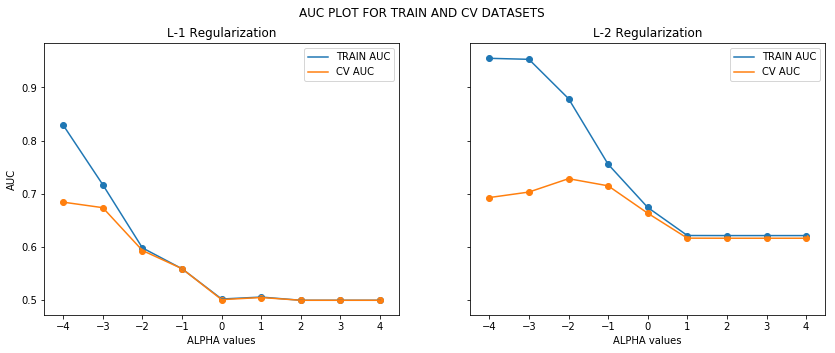

In [62]:
cross_validate_plot(def_model,alpha_vals,norm_values,X_train_bow,y_train,no_folds)

In [63]:
optimal_alpha={}
optimal_alpha['l1']=10**-4
optimal_alpha['l2']=10**-2

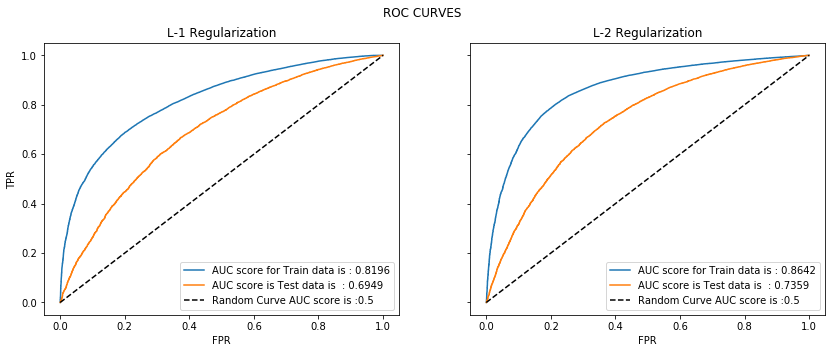

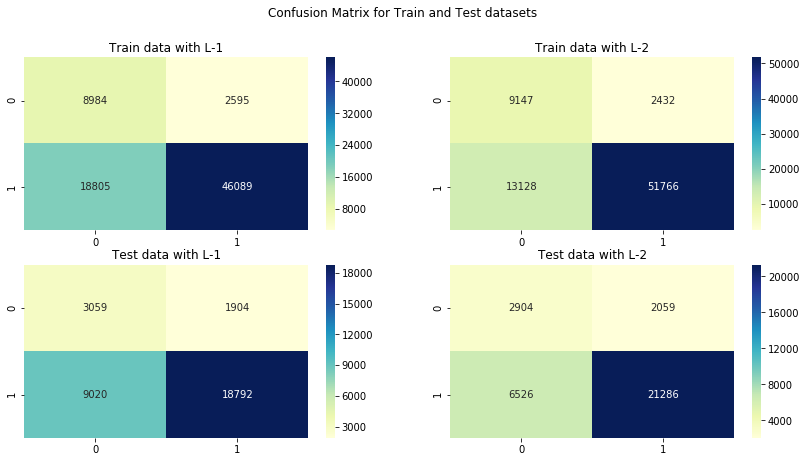

+------------------+-------------------+---------------+----------------------------+----------------+
|   Regularizer    | Training Accuracy | Test Accuracy | Max value of (TPR*(1-FPR)) | Theshold value |
+------------------+-------------------+---------------+----------------------------+----------------+
| l1 - REGULARIZER |      0.72016      |     0.6667    |          0.55105           |    0.83734     |
+------------------+-------------------+---------------+----------------------------+----------------+
| l2 - REGULARIZER |      0.79653      |    0.73806    |          0.63016           |     0.8145     |
+------------------+-------------------+---------------+----------------------------+----------------+


In [64]:
build_best_model_plot_roc(def_model,optimal_alpha,X_train_bow,y_train,X_test_bow,y_test)

In [65]:
del X_train_bow
del X_test_bow

In [66]:
summry=[]
reg_scores={}

In [67]:
reg_scores['l1']=[.8196,.6949]
reg_scores['l2']=[.8642,.7359]
build_summary('SGDClassifier',"Bow", "K-FOLD",optimal_alpha,reg_scores)

##  TF-IDF

###  project_title

In [68]:
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,2),min_df=10)
tf_idf_vectorizer.fit(X_train.project_title.values)
X_tr_title=tf_idf_vectorizer.transform(X_train.project_title.values)
X_te_title=tf_idf_vectorizer.transform(X_test.project_title.values)

### essay

In [69]:
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,2),min_df=10)
tf_idf_vectorizer.fit(X_train.essay.values)
X_tr_essay=tf_idf_vectorizer.transform(X_train.essay.values)
X_te_essay=tf_idf_vectorizer.transform(X_test.essay.values)


### project_resource_summary

In [70]:
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,2),min_df=10)
tf_idf_vectorizer.fit(X_train.project_resource_summary.values)
X_tr_resource=tf_idf_vectorizer.transform(X_train.project_resource_summary.values)
X_te_resource=tf_idf_vectorizer.transform(X_test.project_resource_summary.values)

In [71]:
X_train_tfidf=hstack((X_tr_vec,X_tr_title,X_tr_resource,X_tr_essay)).tocsr()
X_test_tfidf=hstack((X_te_vec,X_te_title,X_te_resource,X_te_essay)).tocsr()

In [72]:
print("TF-IDF:")
print("Training data set shape :",X_train_tfidf.shape)
print("Test data set shape :",X_test_tfidf.shape)

TF-IDF:
Training data set shape : (76473, 163863)
Test data set shape : (32775, 163863)


### Finding right "Alpha" and build model 

100%|██████████| 9/9 [03:45<00:00, 25.01s/it]


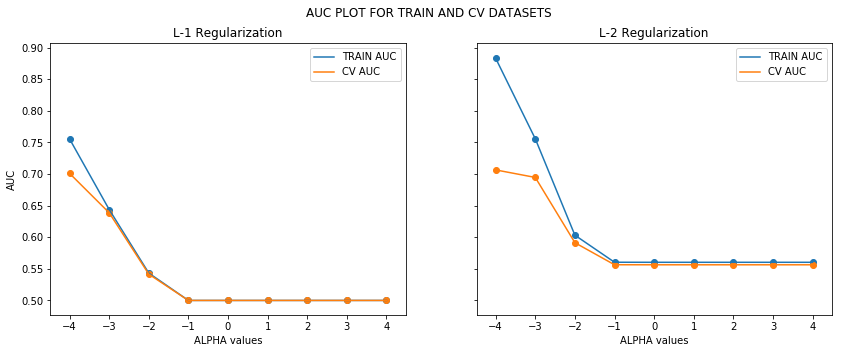

In [73]:
cross_validate_plot(def_model,alpha_vals,norm_values,X_train_tfidf,y_train,no_folds)

In [74]:
optimal_alpha['l1']=10**-4
optimal_alpha['l2']=10**-4

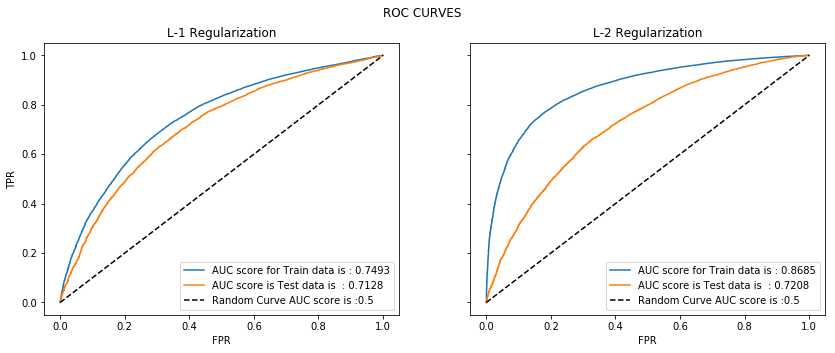

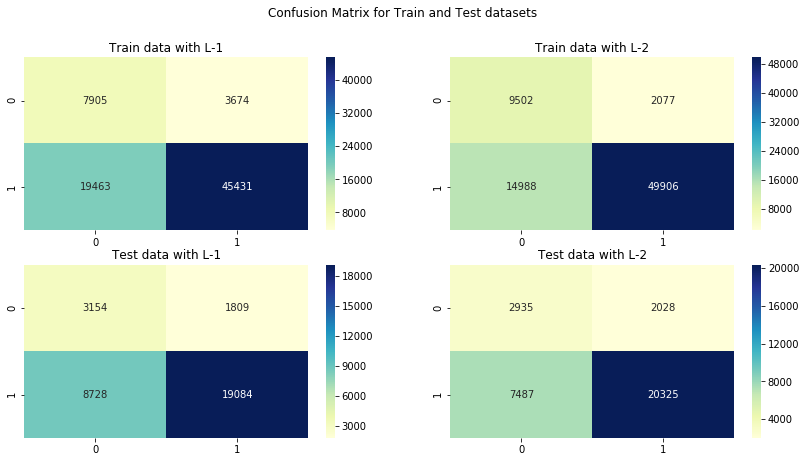

+------------------+-------------------+---------------+----------------------------+----------------+
|   Regularizer    | Training Accuracy | Test Accuracy | Max value of (TPR*(1-FPR)) | Theshold value |
+------------------+-------------------+---------------+----------------------------+----------------+
| l1 - REGULARIZER |      0.69745      |     0.6785    |          0.47795           |    0.84147     |
+------------------+-------------------+---------------+----------------------------+----------------+
| l2 - REGULARIZER |      0.77685      |    0.70969    |          0.63109           |    0.82782     |
+------------------+-------------------+---------------+----------------------------+----------------+


In [75]:
build_best_model_plot_roc(def_model,optimal_alpha,X_train_tfidf,y_train,X_test_tfidf,y_test)

In [76]:
reg_scores['l1']=[.7493,.7128]
reg_scores['l2']=[.8685,.7208]
build_summary('SGD Classifier',"tf_idf", "cross_validate",optimal_alpha,reg_scores)

## Task-2(Truncated SVD on TF-IDF Vectorizer)

In [77]:
# Due to memory issues only used 5000 features from dataset
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,2),min_df=10,max_features=5000)
tf_idf_vectorizer.fit(X_train.essay.values)
X_tr_essay=tf_idf_vectorizer.transform(X_train.essay.values)
X_te_essay=tf_idf_vectorizer.transform(X_test.essay.values)

In [78]:
print("Before Reducing Dimenionatiy :\n")
print("Essay feature shape of Train data:",X_tr_essay.shape)
print("Essay feature shape of Test data: :",X_te_essay.shape)

Before Reducing Dimenionatiy :

Essay feature shape of Train data: (76473, 5000)
Essay feature shape of Test data: : (32775, 5000)


In [79]:
# Code ref:https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_tsvd/
svd = TruncatedSVD(n_components=X_tr_essay.shape[1]-1,random_state=103)
svd.fit(X_tr_essay)

TruncatedSVD(algorithm='randomized', n_components=4999, n_iter=5,
       random_state=103, tol=0.0)

In [80]:
comp_to_variance={}
cum_var_ratio=0.0

for comp,cur_var in  enumerate(svd.explained_variance_ratio_):
    cum_var_ratio+=cur_var
    comp_to_variance[comp+1]=cum_var_ratio

del cum_var_ratio

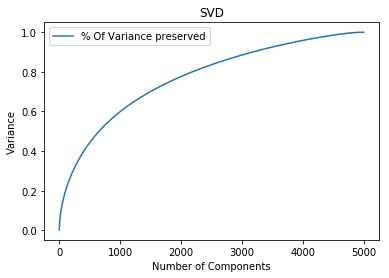

In [81]:
plt.plot(list(comp_to_variance.keys()),list(comp_to_variance.values()),label="% Of Variance preserved")
plt.xlabel("Number of Components")
plt.ylabel("Variance")
plt.legend()
plt.title("SVD")
plt.show()

### Decision through Observation : 
### With the 3200 components we preserved 90% of the information .so we can choose  3200 componets  as our newnumber of dimensions instead of 5000 features. we are reduced by 1800 features and 36% of the featureset

In [82]:
svd = TruncatedSVD(n_components=3200,random_state=103)
svd.fit(X_tr_essay)
X_tr_essay=svd.transform(X_tr_essay)
X_te_essay=svd.transform(X_te_essay)

In [83]:
print("After Reducing Dimenionatiy :\n")
print("Essay feature shape of Train data:",X_tr_essay.shape)
print("Essay feature shape of Test data: :",X_te_essay.shape)

After Reducing Dimenionatiy :

Essay feature shape of Train data: (76473, 3200)
Essay feature shape of Test data: : (32775, 3200)


In [84]:
X_train_tfidf=hstack((X_tr_vec,X_tr_essay)).tocsr()
X_test_tfidf=hstack((X_te_vec,X_te_essay)).tocsr()

In [85]:
print("Truncated SVD:")
print("Training data set shape :",X_train_tfidf.shape)
print("Test data set shape :",X_test_tfidf.shape)

Truncated SVD:
Training data set shape : (76473, 3301)
Test data set shape : (32775, 3301)


100%|██████████| 9/9 [26:44<00:00, 178.30s/it]


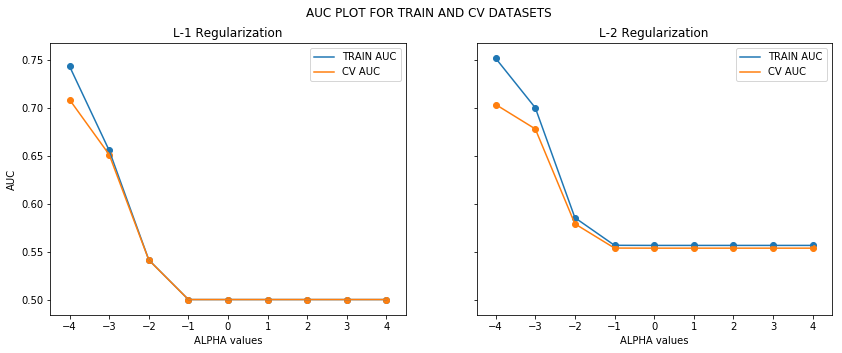

In [86]:
cross_validate_plot(def_model,alpha_vals,norm_values,X_train_tfidf,y_train,no_folds)

In [87]:
optimal_alpha['l1']=10**-4
optimal_alpha['l2']=10**-4

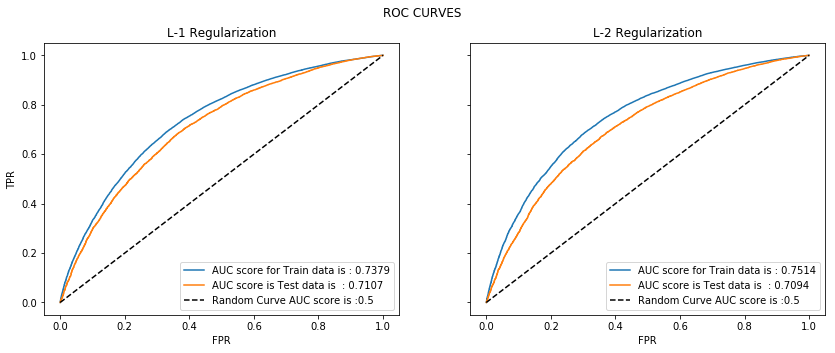

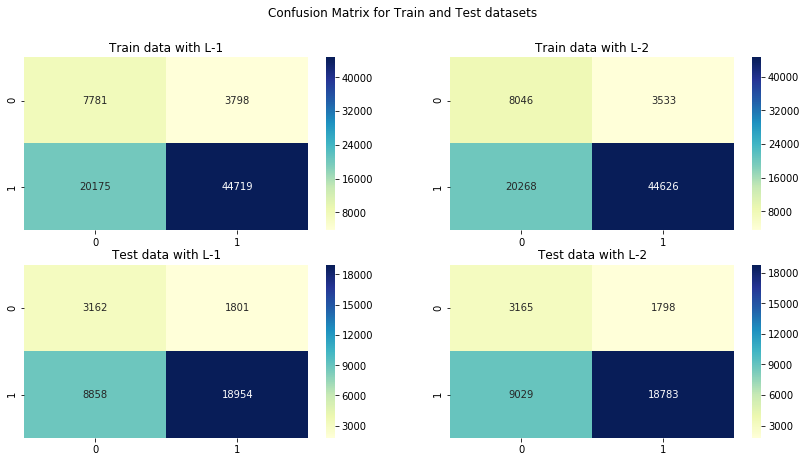

+------------------+-------------------+---------------+----------------------------+----------------+
|   Regularizer    | Training Accuracy | Test Accuracy | Max value of (TPR*(1-FPR)) | Theshold value |
+------------------+-------------------+---------------+----------------------------+----------------+
| l1 - REGULARIZER |      0.68652      |    0.67478    |          0.46308           |    0.83383     |
+------------------+-------------------+---------------+----------------------------+----------------+
| l2 - REGULARIZER |      0.68877      |    0.66966    |          0.47785           |    0.83721     |
+------------------+-------------------+---------------+----------------------------+----------------+


In [88]:
build_best_model_plot_roc(def_model,optimal_alpha,X_train_tfidf,y_train,X_test_tfidf,y_test)

In [89]:
reg_scores['l1']=[.7379,.7107]
reg_scores['l2']=[.7514,.7094]
build_summary('SGDClassifier',"TruncatedSVD(tf-idf)", "KFold",optimal_alpha,reg_scores)

In [90]:
# Release the memory 
del X_tr_title
del X_te_title

del X_tr_resource
del X_te_resource

del X_tr_essay
del X_te_essay

In [91]:
del X_train_tfidf
del X_test_tfidf

## Avg W2V

In [92]:
# stronging variables into pickle files python:
#http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('../glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [93]:
# average Word2Vec
def avg_w2vec(glove_words,feature_values):
    # compute average word2vec for each review.
    avg_w2v_vec = []; # the avg-w2v for each sentence/review is stored in this list
    
    for sent in tqdm(feature_values): # for each review/sentence
        sent_vec = np.zeros(300) # as word vectors are of zero length 300, you might need to 
        #change this to 300 if you use google's w2v
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent.split(): # for each word in a review/sentence
            if word in glove_words:
                sent_vec += model[word]
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        avg_w2v_vec.append(sent_vec)
       
    print(len(avg_w2v_vec))
    print(len(avg_w2v_vec[0]))
    
    return avg_w2v_vec

###  project_title

In [94]:
X_tr_title=avg_w2vec(glove_words,X_train.project_title.values)


100%|██████████| 76473/76473 [00:01<00:00, 67036.79it/s]

76473
300


In [95]:
X_te_title=avg_w2vec(glove_words,X_test.project_title.values)

100%|██████████| 32775/32775 [00:00<00:00, 66997.97it/s]

32775
300


### essay

In [96]:
X_tr_essay=avg_w2vec(glove_words,X_train.essay.values)


100%|██████████| 76473/76473 [00:19<00:00, 3886.88it/s]

76473
300


In [97]:
X_te_essay=avg_w2vec(glove_words,X_test.essay.values)

100%|██████████| 32775/32775 [00:08<00:00, 3875.60it/s]

32775
300


###  project_resource_summary

In [98]:
X_tr_resource=avg_w2vec(glove_words,X_train.project_resource_summary.values)

100%|██████████| 76473/76473 [00:02<00:00, 31671.15it/s]

76473
300


In [99]:
X_te_resource=avg_w2vec(glove_words,X_test.project_resource_summary.values)

100%|██████████| 32775/32775 [00:01<00:00, 29909.13it/s]

32775
300


In [100]:
X_train_awv=hstack((X_tr_vec,X_tr_title,X_tr_essay,X_tr_resource)).tocsr()
X_test_awv=hstack((X_te_vec,X_te_title,X_te_essay,X_te_resource)).tocsr()

In [101]:
print("Average Word 2 vector:")
print("Training data set shape :",X_train_awv.shape)
print("Test data set shape :",X_test_awv.shape)

Average Word 2 vector:
Training data set shape : (76473, 1001)
Test data set shape : (32775, 1001)


In [102]:
# Release the memory 
del X_tr_title
del X_te_title

del X_tr_resource
del X_te_resource

del X_tr_essay
del X_te_essay

### Find the right 'alpha' and build the Classifier 

100%|██████████| 9/9 [07:21<00:00, 49.02s/it]


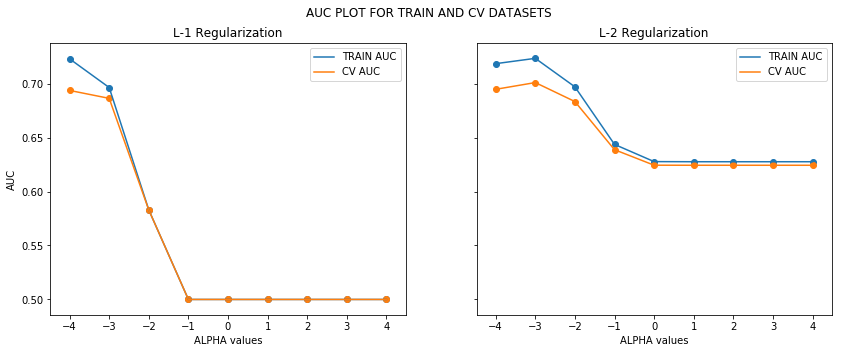

In [103]:
cross_validate_plot(def_model,alpha_vals,norm_values,X_train_awv,y_train,no_folds)

In [104]:
optimal_alpha['l1']=10**-4
optimal_alpha['l2']=10**-3

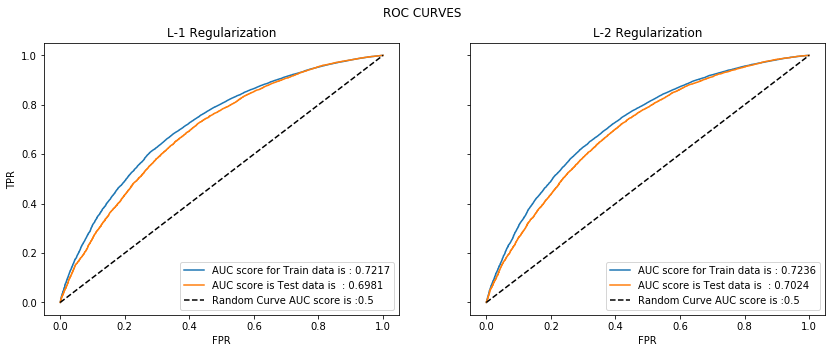

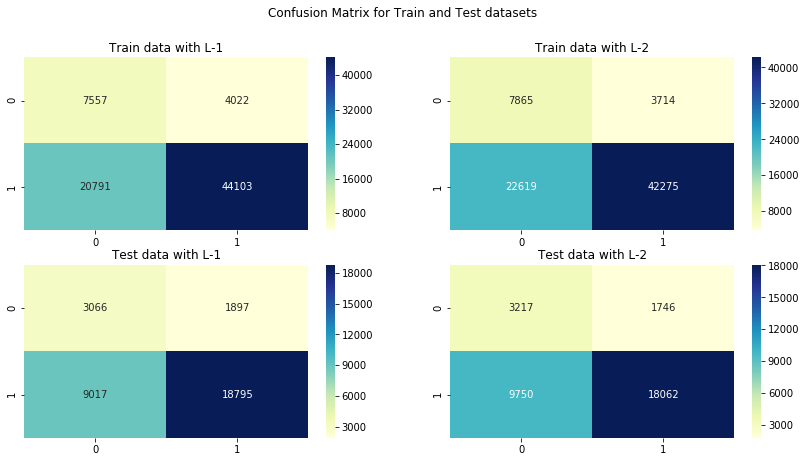

+------------------+-------------------+---------------+----------------------------+----------------+
|   Regularizer    | Training Accuracy | Test Accuracy | Max value of (TPR*(1-FPR)) | Theshold value |
+------------------+-------------------+---------------+----------------------------+----------------+
| l1 - REGULARIZER |      0.67553      |     0.667     |          0.44355           |     0.8384     |
+------------------+-------------------+---------------+----------------------------+----------------+
| l2 - REGULARIZER |      0.65566      |    0.64924    |          0.44249           |    0.84747     |
+------------------+-------------------+---------------+----------------------------+----------------+


In [105]:
build_best_model_plot_roc(def_model,optimal_alpha,X_train_awv,y_train,X_test_awv,y_test)

In [106]:
reg_scores['l1']=[.7217,.6981]
reg_scores['l2']=[.7236,.7024]
build_summary('SGDClassifier',"Avg w2v", "K-Fold",optimal_alpha,reg_scores)

In [107]:
del X_train_awv
del X_test_awv

## TF-IDF AW2V

In [108]:
def tfidf_avgw2v(glove_words,tfidf_words,feature_values):
    processed_tfidf_w2v= []; # the avg-w2v for TITLE is stored in this list
    for sentence in tqdm(feature_values): # for each TITLE
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the TITLE
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and 
                #the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) 
                # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        processed_tfidf_w2v.append(vector)

    print(len(processed_tfidf_w2v))
    print(len(processed_tfidf_w2v[0]))
    
    return processed_tfidf_w2v

### essay

In [109]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train.essay.values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [110]:
X_tr_essay= tfidf_avgw2v(glove_words,tfidf_words,X_train.essay.values)

100%|██████████| 76473/76473 [02:21<00:00, 540.66it/s]

76473
300


In [111]:
X_te_essay= tfidf_avgw2v(glove_words,tfidf_words,X_test.essay.values)


100%|██████████| 32775/32775 [00:57<00:00, 569.90it/s]

32775
300


### project_title

In [112]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train.project_title.values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [113]:
X_tr_title=tfidf_avgw2v(glove_words,tfidf_words,X_train.project_title.values)

100%|██████████| 76473/76473 [00:02<00:00, 28417.93it/s]

76473
300


In [114]:
X_te_title=tfidf_avgw2v(glove_words,tfidf_words,X_test.project_title.values)

100%|██████████| 32775/32775 [00:01<00:00, 29532.03it/s]

32775
300


### project_resource_summary

In [115]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train.project_resource_summary.values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [116]:
X_tr_resource=tfidf_avgw2v(glove_words,tfidf_words,X_train.project_resource_summary.values)

100%|██████████| 76473/76473 [00:07<00:00, 10585.43it/s]

76473
300


In [117]:
X_te_resource=tfidf_avgw2v(glove_words,tfidf_words,X_test.project_resource_summary.values)

100%|██████████| 32775/32775 [00:03<00:00, 10453.31it/s]


32775
300


In [118]:
X_train_tfidfawv=hstack((X_tr_vec,X_tr_title,X_tr_essay,X_tr_resource)).tocsr()
X_test_tfidfawv=hstack((X_te_vec,X_te_title,X_te_essay,X_te_resource)).tocsr()

In [119]:
print("Average Word 2 vector:")
print("Training data set shape :",X_train_tfidfawv.shape)
print("Test data set shape :",X_test_tfidfawv.shape)

Average Word 2 vector:
Training data set shape : (76473, 1001)
Test data set shape : (32775, 1001)


In [120]:
# Release the memory 
del X_tr_title
del X_te_title

del X_tr_resource
del X_te_resource

del X_tr_essay
del X_te_essay

###  Find the right 'alpha' and build the Classifier

100%|██████████| 9/9 [07:49<00:00, 52.13s/it]


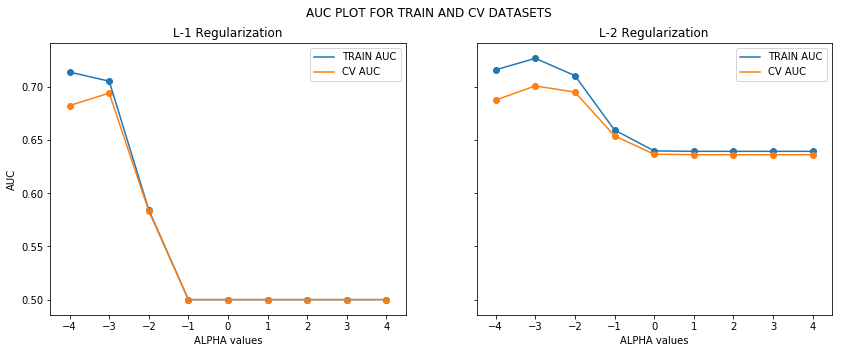

In [121]:
cross_validate_plot(def_model,alpha_vals,norm_values,X_train_tfidfawv,y_train,no_folds)

In [122]:
optimal_alpha['l1']=10**-3
optimal_alpha['l2']=10**-3

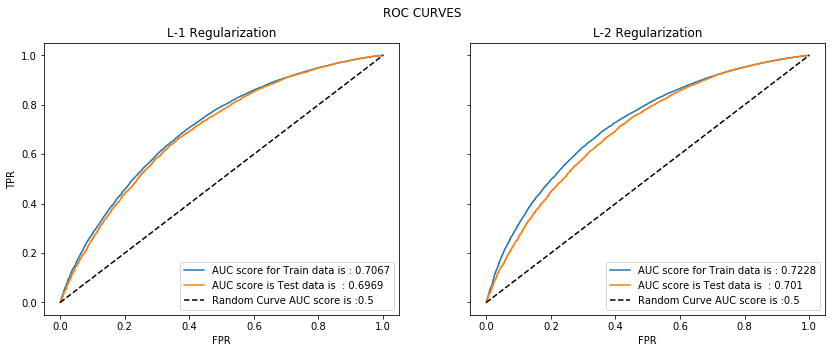

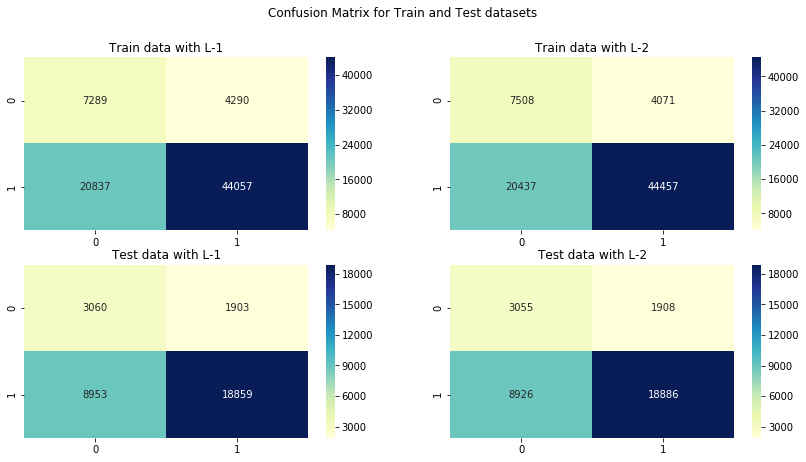

+------------------+-------------------+---------------+----------------------------+----------------+
|   Regularizer    | Training Accuracy | Test Accuracy | Max value of (TPR*(1-FPR)) | Theshold value |
+------------------+-------------------+---------------+----------------------------+----------------+
| l1 - REGULARIZER |      0.67143      |    0.66877    |          0.42737           |    0.83555     |
+------------------+-------------------+---------------+----------------------------+----------------+
| l2 - REGULARIZER |      0.67952      |    0.66944    |          0.44421           |    0.83593     |
+------------------+-------------------+---------------+----------------------------+----------------+


In [123]:
build_best_model_plot_roc(def_model,optimal_alpha,X_train_tfidfawv,y_train,X_test_tfidfawv,y_test)

In [124]:
reg_scores['l1']=[.7067,.6969]
reg_scores['l2']=[.7228,.701]
build_summary('SGDClassifier',"tf_idf avg w2v", "K-Fold",optimal_alpha,reg_scores)

In [125]:
del X_train_tfidfawv
del X_test_tfidfawv

## Summary

In [149]:
print_summary(summry)

+----------------+-------------------------+---------------+--------------------------+-----------+----------+
|     Model      |        Vectorizer       | Method for CV |         Opt Parm         | Train AUC | Test AUC |
+----------------+-------------------------+---------------+--------------------------+-----------+----------+
| SGDCLASSIFIER  |          BOW_L2         |     K-FOLD    |  NORM : L2& ALPHA :0.01  |   0.8642  |  0.7359  |
+----------------+-------------------------+---------------+--------------------------+-----------+----------+
| SGDCLASSIFIER  |          BOW_L1         |     K-FOLD    | NORM : L1& ALPHA :0.0001 |   0.8196  |  0.6949  |
+----------------+-------------------------+---------------+--------------------------+-----------+----------+
| SGD CLASSIFIER |        TF_IDF_L2        |     K-FOLD    | NORM : L2& ALPHA :0.0001 |   0.8685  |  0.7208  |
+----------------+-------------------------+---------------+--------------------------+-----------+----------+
|